
# Cross-Validation Lesson

---

### Learning Objectives
- **Describe** train/test split and cross-validation.
- **Explain** how these validation techniques differ and why we want to use them.
- **Split** data into testing and training sets using both train/test split and cross-validation and **apply** both techniques to score a model.

## Overfitting and Underfitting

---

![](./assets/overfitting.jpg)


**What's wrong with the first model?**
- The underfit model falls short of capturing the complexity of the "true model" of the data.

**What's wrong with the third model?**
- The overfit model is too complex and is modeling random noise in the data.

**The middle model is a good compromise.**
- It approximates the complexity of the true model and does not model random noise in our sample as true relationships.

![](./assets/overfitting2.png)

## Importing libraries

---

We'll need the following libraries for today's lesson:
- `pandas`
- `numpy`
- `seaborn`
- we'll need a `LinearRegression` from `sklearn.linear_model`
- from `sklearn.model_selection` we'll need `train_test_split`, and `cross_val_score`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

<a id='demo'></a>

## Load the Data

---

Today's [dataset](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) (`Advertising.csv`) is from the [ISLR website](http://faculty.marshall.usc.edu/gareth-james/ISL/). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [2]:
ads = pd.read_csv('./data/Advertising.csv')
ads.drop('Unnamed: 0', axis=1, inplace=True)

## Data cleaning
---

Check the following in the cells below:
1. Do we have any null values?
2. Do we have all numerical columns?

In [3]:
# Check for nulls
ads.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
# Check column data types
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
# Two for the price of one:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

In [6]:
# Correlation matrix
corr_mat = ads.corr()

In [8]:
# Correlation with the target varialbe (sales) - data series
corr_mat['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

In [ ]:
# Correlation with the target varialbe (sales) - data frame


<Axes: >

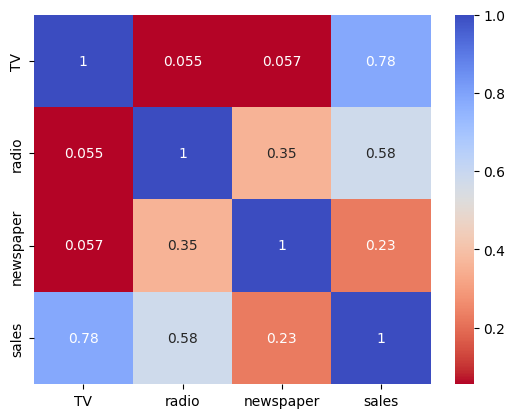

In [10]:
# Correlation heatmap
sns.heatmap(corr_mat, cmap='coolwarm_r', annot=True)

<Axes: >

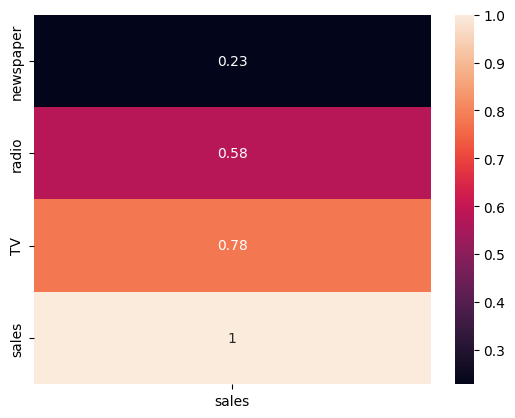

In [11]:
#  heatmap with features correlation with sales only
sns.heatmap(corr_mat[['sales']].sort_values('sales'), annot=True)

## EDA: Use seaborn's `.pairplot()` method to create scatterplots for each of our columns
---

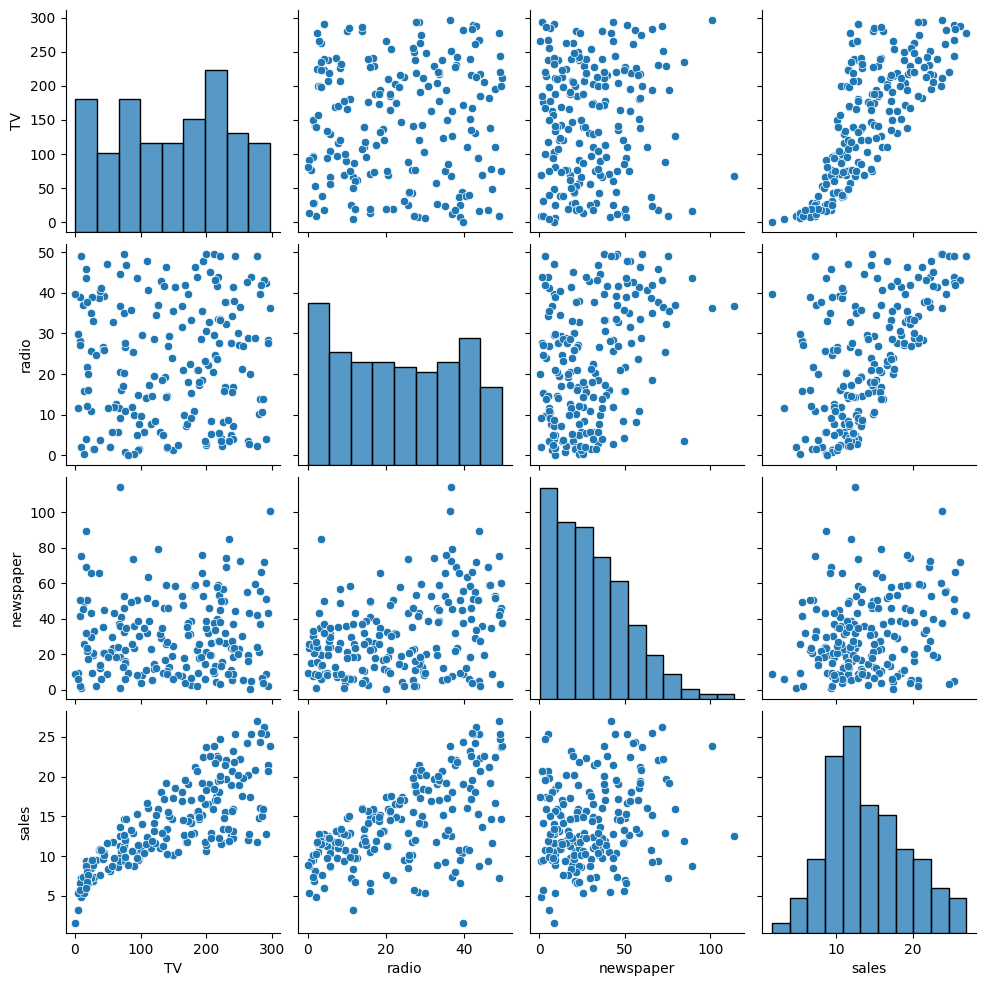

In [12]:
sns.pairplot(ads)

<Axes: xlabel='TV', ylabel='sales'>

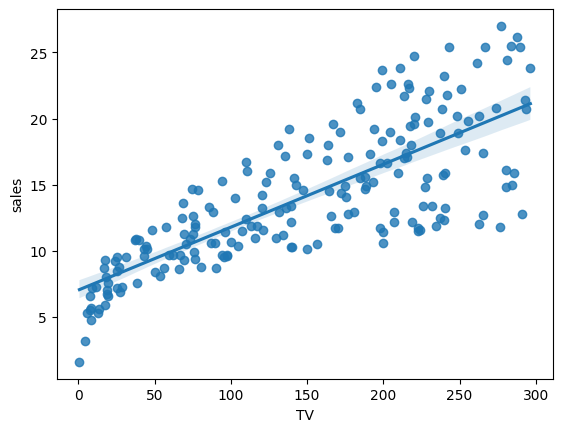

In [13]:
# Grab just TV and sales
sns.regplot(data=ads, x='TV', y='sales')

In [ ]:
# Grab just TV and sales - and plot once! 


<a id='x-y'></a>

## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [14]:
# Create a list of features
# use the list to create feature matrix (X)
X = ads[['TV', 'radio', 'newspaper']] # another way to create X - uncomment to run
# Create y vector
y = ads['sales']

<a name="train-test-split"></a>
## Train/Test Split and Model Validation

---

So far we've focused on fitting the best model to our data. But is this the best model for our sample data or the best model overall? How do we know?

In practice we need to validate our model's ability to generalize to new data. One popular method for performing model validation is by splitting our data into subsets: data on which we *train* our model and data on which we *test* our model.

The most basic type of "hold-out" validation is called **train/test split**. We split our data into two pieces:

> **"A Training Set":** The subset of the data on which we fit our model.

> **"A Testing Set":** The subset of the data on which we evaluate the quality of our predictions.


**Train/Test Split Benefits:**

- Testing data can represent "future" data; for prediction-oriented models, it's critical to ensure that a model that is performing well on current data will likely perform well on future data.
- It can help diagnose and avoid overfitting via model tuning.
- It can improve the quality of our predictions.

**Visual representation of Train-Test Split**:  
![](assets/train-test-split.png)

<a id='sklearn-tts'></a>

## Scikit-Learn's `train_test_split` Function
---

Performing train/test splits using scikit-learn is easy — load the `train_test_split` function:

```python
from sklearn.model_selection import train_test_split
```

**Arguments**:
- *Arrays*: Any number of arrays/matrices to split up into training and testing sets (they should be the same length).
- `test_size`: An integer representing the exact size of the testing subset or a float for a percentage.
- `train_size`: Alternatively, you can specify the training size.
- `stratify`: Supply a vector to stratify the splitting (more important for classification tasks).
- `random_state`: a numerical seed for randomly splitting your data with reproducibility

**Perform a split of our `X` and `y`.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [16]:
print(f"Shape of original data frame: {ads.shape}")
print(" ")
print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(" ")
print(f"Shape of X test: {X_test.shape}")
print(f"Shape of y test: {y_test.shape}")

Shape of original data frame: (200, 4)
 
Shape of X train: (150, 3)
Shape of y train: (150,)
 
Shape of X test: (50, 3)
Shape of y test: (50,)


## Linear Regression model
---

In the cells below:
1. create a `LinearRegression` model
2. fit it to your **training data** (`X_train`, `y_train`)

In [17]:
# instantiate linear regression
# fit on training data ONLY
model = LinearRegression().fit(X_train, y_train)

## Model Evaluation
---

We need two scores to determine if our model is performing well, or experiencing high bias/variance. Use the `.score()` method on **both** the training set (`X_train`, `y_train`) and the test set (`X_test`, `y_test`).

```python
model.score(X_train, y_train)
```

In [19]:
# Train score
model.score(X_train, y_train)

0.8906528393320297

In [20]:
# Test score
model.score(X_test, y_test)

0.9144692690504649

### Different Train-Test split sizes and random state:

In [21]:
# Vary Train Test Split by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)

## Evaluating error (MSE and RMSE) for training and testing

In [24]:
# Training MSE
model2 = LinearRegression().fit(X_train, y_train)

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
# Testing MSE
yhat_train = model2.predict(X_train)
np.mean((y_train - yhat_train)**2)

yhat_test = model2.predict(X_test)

In [29]:
# Training RMSE
print(mean_squared_error(y_train, yhat_train, squared=False))
# Testing RMSE
print(mean_squared_error(y_test, yhat_test, squared=False))

1.8306006587837205
1.5236644918108357


<a id='cross-val-k-fold'></a>

## K-Fold Cross-Validation

---

K-fold cross-validation takes the idea of a single train/test split and expands it to *multiple tests* across different train/test splits of your data.

For example, if you determine your training set will contain 80 percent of the data and your testing set will contain the other 20 percent, you could have five different 80/20 splits in which the test set in each is a different set of observations. We have:
- Five (K=5) training sets.
- Five (K=5) corresponding testing sets.

**K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.**

### K-Fold Cross-Validation Visually

<img src="https://snag.gy/o1lLcw.jpg?convert_to_webp=true" width="500">

---

Cross-validation helps us understand how a model parameterization may perform in a variety of cases. The k-fold cross-validation procedure can be described in pseudocode:

```
set k
create k groups of rows in data

for group i in k row groups:
    test data is data[group i]
    train data is data[all groups not i]
    
    fit model on train data
    
    score model on test data
    
evaluate mean of k model scores
evaluate variance of k model scores
```

Odd case No. 1:
> **When K=2**: This is equivalent to performing ***two*** mirror image 50-50 train/test splits.

Odd case No. 2:
> **When K=number of rows**: This is known as "leave-one-out cross-validation," or LOOCV. A model is built on all but one row and tested on the single excluded observation.

## K-Folds Cross Validation in `sklearn`
---

Now let's try out k-fold cross-validation. Again, scikit-learn provides useful functions to do the heavy lifting. 

The function `cross_val_score` returns the $R^2$ for each testing set. 

In the cells below, score your model using `cross_val_score`.


In [32]:
# instantiate a linear regression
lr_cv = LinearRegression()

# Use the model in cross_val_score
cv_scores = cross_val_score(lr_cv, X_train, y_train, cv=5)

In [33]:
# get the mean cross validated testing score
np.mean(cv_scores)

0.8641857466990747

In [34]:
# get the standard deviation from cross validated testing score
np.std(cv_scores)

0.06186307903487325

![](./assets/Train-Test-Split-CV.png)

In [38]:
# Running cross validation on the training subset
# cv changes the number of folds
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=22)
cv_scores = cross_val_score(lr_cv, X_train, y_train)

In [41]:
cv_scores

array([0.90107937, 0.71191874, 0.91254155, 0.91771127, 0.80089417])

### Generating predictions from a single model 

In [39]:
# Making predictions using the testing subset
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.8488290203188171
0.08071719160075645


### Generating predictions using cross_val_predict

In [40]:
# Generting cross validated predictions 
from sklearn.model_selection import cross_val_predict
cross_val_predict(lr_cv, X_test, y_test)

array([ 9.75921879,  9.71191808,  7.2013832 , 24.44913519, 17.54271753,
        8.5817358 ,  3.89906624,  7.01822391, 19.4459794 , 11.45448783,
        5.98605571, 19.85723158, 20.04420038, 18.1039642 , 15.28778795,
        8.97033559, 21.71957872, 23.01861489, 13.32109122, 10.27491366,
       16.66362405, 19.25573966, 19.49924701, 14.55864536, 13.26594376,
       16.00925023, 10.27119537, 10.39535076, 17.38286572, 22.17750521,
       13.21370386, 17.37167886,  8.69333656, 10.82585134,  8.35593052,
        8.85018607, 16.68185837, 18.09871932, 11.37022427,  9.82431901,
       23.21549079, 10.40014458, 11.51610685, 19.74987429, 11.5228151 ,
       16.29255131, 13.91985461,  6.54204027, 17.29920006, 15.0956323 ])

<a id='additional-resources'></a>

## Additional Resources

---

- [Cross-Validation Example](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py).
- Review this [academic paper](http://frostiebek.free.fr/docs/Machine%20Learning/validation-1.pdf) on the underpinnings of the hold-out method, LOOCV, and k-folds.
- Review the scikit-learn [documentation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) on cross-validation.
- Review this [Stanford lesson](https://www.youtube.com/watch?v=_2ij6eaaSl0) on cross-validation.
- Review this [blog post](http://www.win-vector.com/blog/2015/01/random-testtrain-split-is-not-always-enough/) on why TTS is not always sufficient.
- Review this Stack Exchange [discussion](http://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio) on approximate TTS and validation set sizes.